In [61]:
import pandas as pd
import numpy as np

from tqdm.auto import tqdm

# Visulization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.spatial.distance import mahalanobis

# Scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# Metric
from sklearn.metrics import mean_absolute_error

import warnings
warnings.simplefilter(action='ignore')

## 1. 데이터 불러오기

### A. Train

In [2]:
train_df = pd.read_csv('./data/train.csv')

In [3]:
train_df

,id,name,class,pay,overall,position,age,height,weight,bodytype,...,gk_diving,gk_handle,gk_kick,gk_reflex,gk_positioning,teamcolor,clubname,clubimg,mugshot,price
0,100000250,데이비드 베컴,ICONTM,31,122,RM,1975.05.02 (49세),182,74,보통,...,35,37,38,36,37,"파리 생제르맹, AC 밀란, AC 밀란, LA 갤럭시, 레알 마드리드, 프레스턴 노스 엔드, 맨체스터 유나이티드",NaN,NaN,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/playersAction/p100000250.png,1390000000000
1,100001114,로베르토 바조,ICONTM,32,123,CF,1967.02.18 (57세),174,73,보통(고유),...,34,34,37,37,36,"브레시아, 인테르, 볼로냐, AC 밀란, 유벤투스, 피오렌티나, 비첸자",NaN,NaN,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/playersAction/p100001114.png,1180000000000
2,100001256,클라렌스 세이도르프,ICONTM,30,120,CAM,1976.04.01 (48세),176,78,건장,...,34,35,34,34,35,"보타포구, AC 밀란, 인테르, 레알 마드리드, 삼프도리아, 아약스",NaN,NaN,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/playersAction/p100001256.png,288000000000
3,100001625,티에리 앙리,ICONTM,31,122,ST,1977.08.17 (47세),188,83,마름,...,35,37,34,37,35,"아스널, 뉴욕 레드불스, FC 바르셀로나, 아스널, 유벤투스, AS 모나코",NaN,NaN,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/playersAction/p100001625.png,2260000000000
4,100001668,클로드 마켈렐레,ICONTM,29,120,CDM,1973.02.18 (51세),174,70,보통,...,36,34,36,34,37,"파리 생제르맹, 첼시, 레알 마드리드, 셀타 비고, 올랭피크 마르세유, FC 낭트, 스타드 브레스트 29",NaN,NaN,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/playersAction/p100001668.png,307000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62381,512268313,제카,23KL,13,85,ST,1997.03.10 (27세),190,84,보통,...,35,30,29,32,36,"포항 스틸러스, 미라쏠, 대구 FC, 론드리나, 오에스치, 크리시우마, 고이아스, 보아비스타, 바이아, 이피랑가 - BA",포항 스틸러스,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/crests/light/small/l1474.png,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/playersAction/p512268313.png,5530000
62382,512269093,김진호,23KL,7,72,RWB,2000.01.21 (24세),178,74,보통,...,30,30,31,34,29,강원 FC,강원 FC,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/crests/light/small/l112115.png,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/players/p269093.png,1150
62383,512272733,오베르당,23KL,13,82,CM,1995.07.30 (29세),175,69,보통,...,31,31,32,32,29,"포항 스틸러스, 피게이렌세, 피게이렌세, 플루미넨세, FC 카스카벨, 리우 브랑코",포항 스틸러스,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/crests/light/small/l1474.png,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/playersAction/p512272733.png,3280000
62384,512272870,루카스 바르셀루스,23KL,10,80,ST,1998.07.19 (26세),182,82,보통,...,31,36,33,33,31,"대구 FC, CSA - AL, 아소시아상 데스포르치바 콘피안사, 플루미넨세, 피게이렌세",대구 FC,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/crests/light/small/l2056.png,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/playersAction/p512272870.png,77100


### B. Test

In [4]:
test_df = pd.read_csv('./data/test.csv')

In [5]:
test_df

,id,name,class,pay,overall,position,age,height,weight,bodytype,...,gk_diving,gk_handle,gk_kick,gk_reflex,gk_positioning,teamcolor,clubname,clubimg,mugshot,price
0,100001075,A. 델피에로,ICONTM,31,121,CF,1974.11.09 (50세),174,74,보통(고유),...,34,33,34,34,35,"델리 다이너모스 FC, 시드니 FC, 유벤투스, 파도바",NaN,NaN,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/playersAction/p100001075.png,475000000000
1,100048940,페트르 체흐,ICONTM,26,120,GK,1982.05.20 (42세),196,90,마름,...,124,120,112,123,121,"아스널, 첼시, 스타드 렌, 스파르타 프라하, 흐멜 블샤니",NaN,NaN,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/playersAction/p100048940.png,310000000000
2,100121939,필립 람,ICONTM,30,121,RB,1983.11.11 (41세),170,65,마름,...,36,38,34,37,35,"VfB 슈투트가르트, 바이에른 뮌헨",NaN,NaN,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/playersAction/p100121939.png,662000000000
3,100247553,가린샤,ICONTM,31,123,RW,1933.10.28 (91세),169,72,보통,...,35,34,34,38,36,"오라리아 AC, 플라멩구, 유니오르 FC, 포르탈레자, 포르투게자, 코린치안스, 보타포구",NaN,NaN,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/playersAction/p100247553.png,913000000000
4,100254642,페렌츠 푸스카스,ICONTM,31,124,CF,1927.04.01,172,72,건장,...,34,35,35,36,36,"레알 마드리드, 부다페스트 혼베드",NaN,NaN,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/playersAction/p100254642.png,1650000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,300275270,A. 카리,22LIVE,5,54,CM,2004.11.19 (20세),176,71,보통,...,16,14,16,10,12,NaN,FC 로리앙,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/crests/light/small/l217.png,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/players/not_found.png,1000
358,300275271,O. 보에센,22LIVE,5,48,CM,2005.05.05 (19세),188,80,마름,...,12,13,10,14,14,NaN,실케보르 IF,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/crests/light/small/l270.png,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/players/not_found.png,1000
359,300275272,M. 로버츠,22LIVE,5,51,GK,2001.12.09 (23세),193,82,보통,...,58,49,47,55,51,NaN,왓퍼드,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/crests/light/small/l1795.png,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/players/not_found.png,1010
360,300275273,A. 바소 리치,22LIVE,5,55,ST,2004.06.29 (20세),176,72,보통,...,12,13,11,15,16,NaN,크레모네세,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/crests/light/small/l111434.png,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/players/not_found.png,1000


### C. Concat -> All

In [6]:
all_df = pd.concat([train_df, test_df], axis=0)
all_df.reset_index(drop=True, inplace=True)

In [7]:
all_df

,id,name,class,pay,overall,position,age,height,weight,bodytype,...,gk_diving,gk_handle,gk_kick,gk_reflex,gk_positioning,teamcolor,clubname,clubimg,mugshot,price
0,100000250,데이비드 베컴,ICONTM,31,122,RM,1975.05.02 (49세),182,74,보통,...,35,37,38,36,37,"파리 생제르맹, AC 밀란, AC 밀란, LA 갤럭시, 레알 마드리드, 프레스턴 노스 엔드, 맨체스터 유나이티드",NaN,NaN,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/playersAction/p100000250.png,1390000000000
1,100001114,로베르토 바조,ICONTM,32,123,CF,1967.02.18 (57세),174,73,보통(고유),...,34,34,37,37,36,"브레시아, 인테르, 볼로냐, AC 밀란, 유벤투스, 피오렌티나, 비첸자",NaN,NaN,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/playersAction/p100001114.png,1180000000000
2,100001256,클라렌스 세이도르프,ICONTM,30,120,CAM,1976.04.01 (48세),176,78,건장,...,34,35,34,34,35,"보타포구, AC 밀란, 인테르, 레알 마드리드, 삼프도리아, 아약스",NaN,NaN,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/playersAction/p100001256.png,288000000000
3,100001625,티에리 앙리,ICONTM,31,122,ST,1977.08.17 (47세),188,83,마름,...,35,37,34,37,35,"아스널, 뉴욕 레드불스, FC 바르셀로나, 아스널, 유벤투스, AS 모나코",NaN,NaN,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/playersAction/p100001625.png,2260000000000
4,100001668,클로드 마켈렐레,ICONTM,29,120,CDM,1973.02.18 (51세),174,70,보통,...,36,34,36,34,37,"파리 생제르맹, 첼시, 레알 마드리드, 셀타 비고, 올랭피크 마르세유, FC 낭트, 스타드 브레스트 29",NaN,NaN,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/playersAction/p100001668.png,307000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62743,300275270,A. 카리,22LIVE,5,54,CM,2004.11.19 (20세),176,71,보통,...,16,14,16,10,12,NaN,FC 로리앙,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/crests/light/small/l217.png,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/players/not_found.png,1000
62744,300275271,O. 보에센,22LIVE,5,48,CM,2005.05.05 (19세),188,80,마름,...,12,13,10,14,14,NaN,실케보르 IF,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/crests/light/small/l270.png,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/players/not_found.png,1000
62745,300275272,M. 로버츠,22LIVE,5,51,GK,2001.12.09 (23세),193,82,보통,...,58,49,47,55,51,NaN,왓퍼드,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/crests/light/small/l1795.png,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/players/not_found.png,1010
62746,300275273,A. 바소 리치,22LIVE,5,55,ST,2004.06.29 (20세),176,72,보통,...,12,13,11,15,16,NaN,크레모네세,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/crests/light/small/l111434.png,https://fo4.dn.nexoncdn.co.kr/live/externalAssets/common/players/not_found.png,1000


## 2. 전처리

### 2.1. 나이 / 국가

In [8]:
def age_changer(x):
    birthyear = x[:4]
    newage = 2024 - int(birthyear)
    return newage

def nation_changer(x):
    if x not in ['잉글랜드', '스페인', '독일', '프랑스', '대한민국', '아르헨티나', '이탈리아', '브라질', '네덜란드', '포르투갈']:
        return 'others'
    else:
        return str(x)

In [9]:
all_df['age'] = all_df['age'].apply(age_changer)
all_df['nation'] = all_df['nation'].apply(nation_changer)

In [10]:
all_df.age.describe()

count    62748.000000
mean        29.986948
std          6.460436
min         18.000000
25%         25.000000
50%         29.000000
75%         34.000000
max        117.000000
Name: age, dtype: float64

In [11]:
all_df.nation.value_counts()

others    30299
잉글랜드       5393
스페인        4154
독일         3865
프랑스        3820
대한민국       3410
아르헨티나      3182
이탈리아       2646
브라질        2487
네덜란드       1931
포르투갈       1561
Name: nation, dtype: int64

### 2.2. One-Hot

In [12]:
obj_keys = ['class', 'position', 'bodytype', 'reputation', 'nation']
ohe = OneHotEncoder(sparse=False)
fitter = ohe.fit(all_df[obj_keys])
temp = ohe.transform(all_df[obj_keys])

In [13]:
encode_df = pd.DataFrame(temp, columns=['17LIVE', '18KFA', '18LIVE', '18PLA', '18PLS', '18TOTY', '19KFA',
        '19LIVE', '19NG', '19PLA', '19PLS', '19TOTS', '19TOTY', '19UCL',
        '2012KH', '20KL', '20KLB', '20LIVE', '20NG', '20PL', '20TOTN',
        '20TOTS', '20TOTY', '20UCL', '21KFA', '21KL', '21KLB', '21LIVE',
        '21NG', '21PL', '21TOTN', '21TOTS', '21TOTY', '21UCL', '22HR',
        '22KFA', '22KL', '22KLB', '22LIVE', '22NG', '22PL', '22TOTN',
        '22TOTS', '22TOTY', '22UCL', '23HR', '23KL', '23TOTN', '23TOTS',
        '23TOTY', 'BOE21', 'BTB', 'BWC', 'CAP', 'CFA', 'COC', 'EBS', 'FA',
        'GR', 'HG', 'HOT', 'ICON', 'ICONTM', 'LA', 'LH', 'LN', 'LOL', 'MC',
        'MCFC', 'MCICON', 'MOG', 'NHD', 'NTG', 'OTW', 'RMCF', 'RTN', 'SPL',
        'TB', 'TC', 'TKI', 'TKL', 'TT', 'UP', 'VTR', 'WC22', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LF', 'LM', 'LW',
        'LWB', 'RB', 'RF', 'RM', 'RW', 'RWB', 'ST', '건장', '건장(고유)', '마름', '마름(고유)', '보통', '보통(고유)',
        '레전더리', '월드클래스', '유명선수', '일반선수', '탑클래스', 'others', '네덜란드', '대한민국', '독일', '브라질', '스페인', '아르헨티나', '이탈리아',
        '잉글랜드', '포르투갈', '프랑스'])
encode_df.shape

(62748, 124)

In [14]:
final_df = pd.concat([all_df, encode_df], axis=1)
final_df

,id,name,class,pay,overall,position,age,height,weight,bodytype,...,네덜란드,대한민국,독일,브라질,스페인,아르헨티나,이탈리아,잉글랜드,포르투갈,프랑스
0,100000250,데이비드 베컴,ICONTM,31,122,RM,49,182,74,보통,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,100001114,로베르토 바조,ICONTM,32,123,CF,57,174,73,보통(고유),...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,100001256,클라렌스 세이도르프,ICONTM,30,120,CAM,48,176,78,건장,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100001625,티에리 앙리,ICONTM,31,122,ST,47,188,83,마름,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100001668,클로드 마켈렐레,ICONTM,29,120,CDM,51,174,70,보통,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62743,300275270,A. 카리,22LIVE,5,54,CM,20,176,71,보통,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
62744,300275271,O. 보에센,22LIVE,5,48,CM,19,188,80,마름,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62745,300275272,M. 로버츠,22LIVE,5,51,GK,23,193,82,보통,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
62746,300275273,A. 바소 리치,22LIVE,5,55,ST,20,176,72,보통,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
drop_keys = ['id', 'name', 'teamcolor', 'clubname', 'clubimg', 'mugshot', 'traits', 'class', 'position', 'bodytype', 'reputation', 'nation']
for key in drop_keys:
    final_df.drop(key, axis=1, inplace=True)

In [16]:
final_df.columns

Index(['pay', 'overall', 'age', 'height', 'weight', 'skill', 'leftfoot',
       'rightfoot', 'ovr_pace', 'ovr_shoot',
       ...
       '네덜란드', '대한민국', '독일', '브라질', '스페인', '아르헨티나', '이탈리아', '잉글랜드', '포르투갈',
       '프랑스'],
      dtype='object', length=173)

### 2.3. 상관분석

In [ ]:
sns.heatmap(final_df, annot=True, cmap='coolwarm')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/ch/k30xkynn5hj_j3mq25frp2r80000gn/T/ipykernel_66907/3029817779.py", line 1, in <module>
    sns.heatmap(final_df, annot=True, cmap='coolwarm')
  File "/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py", line 46, in inner_f
    return f(**kwargs)
  File "/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py", line 553, in heatmap
    plotter.plot(ax, cbar_ax, kwargs)
  File "/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py", line 336, in plot
    _draw_figure(ax.figure)
  File "/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py", line 95, in _draw_figure
    fig.canvas.draw()
  File "/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "/opt/

TypeError: object of type 'NoneType' has no len()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Error in callback <function flush_figures at 0x7fb15b2f9280> (for post_execute):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py", line 89, in trigger
    func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.9/site-packages/matplotlib_inline/backend_inline.py", line 126, in flush_figures
    return show(True)
  File "/opt/anaconda3/lib/python3.9/site-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/opt/anaconda3/lib/python3.9/site-packages/IPython/core/display.py", line 320, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "/opt/anaconda3/lib/python3.9/site-packages/IPython/core/formatters.py", line 180, in format
    data = formatter(obj)
  File "/opt/anaconda3/lib/python3.9/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
  File "/opt/anaconda3/lib/python3.9/site-packages/IPython/core/formatters.py

## 3. Train/Test split

### A. Columns

- y_col

In [18]:
y_col = 'price'

- x_cols

In [19]:
x_cols = list(final_df.columns)

In [20]:
x_cols.remove(y_col)

In [21]:
x_cols

['pay',
 'overall',
 'age',
 'height',
 'weight',
 'skill',
 'leftfoot',
 'rightfoot',
 'ovr_pace',
 'ovr_shoot',
 'ovr_pass',
 'ovr_dribble',
 'ovr_defence',
 'ovr_physical',
 'sprint',
 'accel',
 'finish',
 'shotpower',
 'longshot',
 'positioning',
 'volley',
 'penalty',
 'shortpass',
 'vision',
 'cross',
 'longpass',
 'freekick',
 'curve',
 'dribble',
 'control',
 'agility',
 'balance',
 'reaction',
 'marking',
 'tackle',
 'intercept',
 'header',
 'sliding',
 'strength',
 'stamina',
 'aggression',
 'jump',
 'composure',
 'gk_diving',
 'gk_handle',
 'gk_kick',
 'gk_reflex',
 'gk_positioning',
 '17LIVE',
 '18KFA',
 '18LIVE',
 '18PLA',
 '18PLS',
 '18TOTY',
 '19KFA',
 '19LIVE',
 '19NG',
 '19PLA',
 '19PLS',
 '19TOTS',
 '19TOTY',
 '19UCL',
 '2012KH',
 '20KL',
 '20KLB',
 '20LIVE',
 '20NG',
 '20PL',
 '20TOTN',
 '20TOTS',
 '20TOTY',
 '20UCL',
 '21KFA',
 '21KL',
 '21KLB',
 '21LIVE',
 '21NG',
 '21PL',
 '21TOTN',
 '21TOTS',
 '21TOTY',
 '21UCL',
 '22HR',
 '22KFA',
 '22KL',
 '22KLB',
 '22LIVE',
 

In [94]:
X_train, X_test, y_train, y_test = train_test_split(final_df[x_cols], final_df[y_col], test_size=0.2, random_state=10000)

## 4. 이상치 제거

### 4.1. 이상치 방법

#### A. Z-score

In [42]:
# Z-점수 계산
z_scores = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

# 이상치 임계값 설정
threshold = 30

# 이상치 제거
outliers = np.where(np.abs(z_scores) > threshold)

#### B. Mahalanobis

In [82]:
# Mahalanobis 거리" 계산
mean_vec = np.mean(X_train, axis=0)
cov_mat = np.cov(X_train.T)
inv_cov_mat = np.linalg.pinv(cov_mat)

distances = [mahalanobis(x, mean_vec, inv_cov_mat) for x in X_train.values]

# 이상치 임계값 설정
threshold = 30

In [83]:
# 이상치 제거
distances = np.array(distances)
outliers = np.where(distances > threshold)

### 4.2. 건수 확인 및 제거

In [84]:
len(outliers[0]) / len(X_train)

0.014004542013626041

In [85]:
# 이상치 제거된 데이터
X_train = np.delete(X_train.values, outliers, axis=0)
y_train = np.delete(y_train.values, outliers, axis=0)

In [86]:
len(X_train)

49495

In [87]:
len(y_train)

49495

## 4. Scaling

### 4.1. X-axis

In [95]:
scaler = MinMaxScaler()
scaler.fit(X_train)

In [97]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4.2. Y-axis

In [155]:
scaler_y = MinMaxScaler()
scaler_y.fit(np.array(y_train.values).reshape(-1, 1))

MinMaxScaler()

In [156]:
y_train_scaled = scaler_y.transform(np.array(y_train.values).reshape(-1, 1))
y_test_scaled = scaler_y.transform(np.array(y_test.values).reshape(-1, 1))

## 5. Modeling

In [98]:
def scoring(model, X_train_scaled, X_test_scaled, y_train, y_test):
    tr_pred = model.predict(X_train_scaled)
    te_pred = model.predict(X_test_scaled)
    
    print("### R2 Score ###")
    print(model.score(X_train_scaled, y_train))
    print(model.score(X_test_scaled, y_test))

    print()
    
    print("###  MAE  ###")
    print(f"TRAIN: {mean_absolute_error(y_train, tr_pred)}")
    print(f"TEST : {mean_absolute_error(y_test, te_pred)}")

### 5.1. 모델 적용

- LinearRegression

In [104]:
# 선형 회귀 모델 생성
model = LinearRegression()

# 모델에 데이터를 학습시킨 후
model.fit(X_train_scaled, y_train)

# 예측 수행
y_pred = model.predict(X_test_scaled)

scoring(model, X_train_scaled, X_test_scaled, y_train, y_test)

### R2 Score ###
0.508481069731627
-971039720483584.9

###  MAE  ###
TRAIN: 1430849229.968405
TEST : 6332420835356697.0


- Ridge

In [105]:
# 릿지 회귀 모델 생성
model = Ridge(alpha=0.5)

# 모델에 데이터를 학습시킨 후
model.fit(X_train_scaled, y_train)

# 예측 수행
y_pred = model.predict(X_test_scaled)

scoring(model, X_train_scaled, X_test_scaled, y_train, y_test)

### R2 Score ###
0.5082042728056949
0.5325650231678407

###  MAE  ###
TRAIN: 1444044919.9321847
TEST : 1506064746.7247567


- Lasso

In [106]:
# 라쏘 회귀 모델 생성
model = Lasso(alpha=0.1)

# 모델에 데이터를 학습시킨 후
model.fit(X_train_scaled, y_train)

# 예측 수행
y_pred = model.predict(X_test_scaled)

scoring(model, X_train_scaled, X_test_scaled, y_train, y_test)

### R2 Score ###
0.5084778636586017
0.5276249787544559

###  MAE  ###
TRAIN: 1434229325.7775915
TEST : 1499449135.5169091


- RandomForest (MAIN)

In [107]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train_scaled, y_train)

scoring(model_rf, X_train_scaled, X_test_scaled, y_train, y_test)

### R2 Score ###
0.9330928917079376
0.711055692042578

###  MAE  ###
TRAIN: 215625010.96307027
TEST : 458239155.7261434


In [163]:
y_train_avg = sum(y_train) / len(y_train)
y_test_avg = sum(y_test) / len(y_test)

In [169]:
y_train_avg

703150421.889119

In [167]:
print("{:.2f}".format(215625010.96307027 / y_train_avg))

0.31


In [170]:
y_test_avg

737666921.1649402

In [168]:
print("{:.2f}".format(458239155.7261434 / y_test_avg))

0.62


- RandomForest (y scaling 버전)

In [158]:
model_rf2 = RandomForestRegressor()
model_rf2.fit(X_train_scaled, y_train_scaled)

scoring(model_rf2, X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)

### R2 Score ###
0.943552363142911
0.7488607829093985

###  MAE  ###
TRAIN: 9.026245743909333e-05
TEST : 0.00019176110916503173


### 5.2. Feature Importance

In [108]:
importance = model_rf.feature_importances_

imp_dict = {}

# 중요도 출력
for i, feature in enumerate(X_test.columns):
    imp_dict[feature] = importance[i]

In [109]:
sorted_imp_dict = sorted(imp_dict.items(), key=lambda x: x[1], reverse=True)

In [214]:
sorted_imp_dict

[('composure', 0.27676733979204254),
 ('overall', 0.1115739258440287),
 ('pay', 0.06745690476450544),
 ('ovr_pace', 0.06079838179408787),
 ('ovr_shoot', 0.04827924789766172),
 ('balance', 0.046432793983895326),
 ('tackle', 0.03288113741406289),
 ('finish', 0.028531867760187908),
 ('ovr_physical', 0.02795554405649284),
 ('agility', 0.026025356620474876),
 ('positioning', 0.022877928580554843),
 ('sprint', 0.020068455051197767),
 ('gk_positioning', 0.01897945006958436),
 ('curve', 0.017118442845318042),
 ('accel', 0.01199403146773623),
 ('reaction', 0.010045247284579244),
 ('strength', 0.010016776354793817),
 ('height', 0.009347623878776058),
 ('weight', 0.008353601375635464),
 ('freekick', 0.008212940728558377),
 ('volley', 0.007868744495670864),
 ('intercept', 0.007523529939895853),
 ('ovr_dribble', 0.00742753442123774),
 ('aggression', 0.007250308191000677),
 ('shotpower', 0.007192208826703164),
 ('sliding', 0.007151918567323549),
 ('dribble', 0.006199221111139416),
 ('jump', 0.006069

### 5.3. 중요도 높은 변수 상관관계 시각화

In [185]:
imp_col_list = []

for col,imp in sorted_imp_dict:
    if imp >= 0.01:
        imp_col_list.append(col)

In [186]:
imp_col_list

['composure',
 'overall',
 'pay',
 'ovr_pace',
 'ovr_shoot',
 'balance',
 'tackle',
 'finish',
 'ovr_physical',
 'agility',
 'positioning',
 'sprint',
 'gk_positioning',
 'curve',
 'accel',
 'reaction',
 'strength']

In [188]:
imp_col_list.append(y_col)

In [192]:
sns.heatmap(final_df[imp_col_list], annot=True, cmap='coolwarm')

<AxesSubplot:>

Error in callback <function flush_figures at 0x7fb15b2f9280> (for post_execute):


KeyboardInterrupt: 

### 5.4. Metric (MAPE)

In [131]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 

In [136]:
tr_rmv_idx = np.where(y_train.values == 0)
y_train_d0 = np.delete(y_train.values, tr_rmv_idx)
tr_pred_d0 = np.delete(tr_pred, tr_rmv_idx)


te_rmv_idx = np.where(y_test.values == 0)
y_test_d0 = np.delete(y_test.values, te_rmv_idx)
te_pred_d0 = np.delete(te_pred, te_rmv_idx)

In [137]:
MAPE(y_train_d0, tr_pred_d0)

9879.964818545182

In [138]:
MAPE(y_test_d0, te_pred_d0)

22264.14093596819

## 6. 시각화

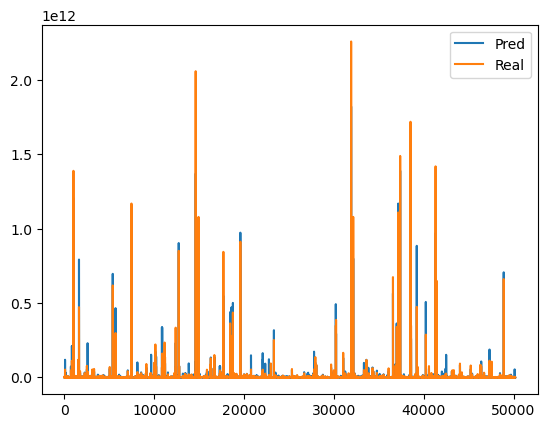

In [145]:
# 그래프 그리기
plt.plot(tr_pred, label='Pred')
plt.plot(y_train.values, label='Real')

plt.legend()
plt.show()

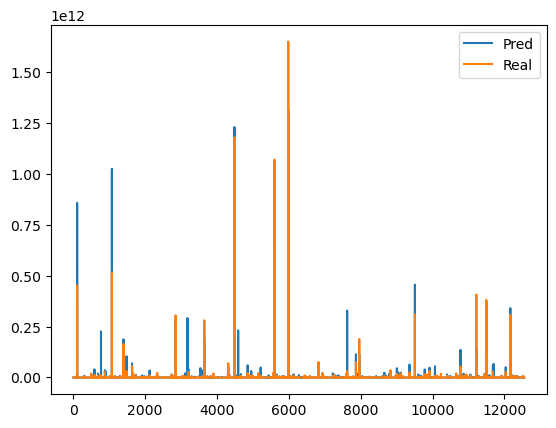

In [144]:
# 그래프 그리기
plt.plot(te_pred, label='Pred')
plt.plot(y_test.values, label='Real')

plt.legend()
plt.show()